In [1]:
import pandas as pd
import glob

In [2]:
csvfiles = glob.glob("data/*.xlsx")

dfs = []

for file in csvfiles:
    df = pd.read_excel(file)
    
    dfs.append(df)
    
data = pd.concat(dfs)

data.head(5)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986
1,2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0
2,2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751
3,2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222
4,2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781


In [3]:
delay_codes = pd.read_csv("delay_codes.csv", index_col="SUB RMENU CODE")

delay_codes.head(2)

,CODE DESCRIPTION
SUB RMENU CODE,
EUAC,Air Conditioning
EUAL,Alternating Current


In [4]:
data2 = data.set_index("Code").join(delay_codes)

data2

,Date,Time,Day,Station,Min Delay,Min Gap,Bound,Line,Vehicle,CODE DESCRIPTION
ERAC,2019-01-30,11:04,Wednesday,MCCOWAN STATION,5,10,N,SRT,3017,Air Conditioning
ERAC,2022-02-22,19:15,Tuesday,MCCOWAN STATION,6,12,S,SRT,3024,Air Conditioning
ERAC,2022-03-30,07:21,Wednesday,MCCOWAN STATION,5,10,NaN,SRT,3000,Air Conditioning
ERAC,2022-07-18,06:52,Monday,LAWRENCE EAST STATION,46,51,N,SRT,3025,Air Conditioning
ERAC,2022-09-07,17:03,Wednesday,MCCOWAN STATION,5,10,N,SRT,3005,Air Conditioning
...,...,...,...,...,...,...,...,...,...,...
TUSUP,2017-05-04,08:50,Thursday,ST CLAIR WEST STATION,6,8,S,YU,5426,Supervisory Error
TUSUP,2017-05-19,21:30,Friday,ST GEORGE YUS STATION,0,0,S,YU,5801,Supervisory Error
TUSUP,2017-05-26,12:45,Friday,NORTH YORK CTR STATION,0,0,N,YU,5551,Supervisory Error
TUTD,2014-04-30,07:22,Wednesday,ISLINGTON STATION,3,6,W,BD,5196,NaN


In [5]:
len(data2.loc[data2["CODE DESCRIPTION"].isna()])

2095

In [6]:
data2.loc[data2["CODE DESCRIPTION"].isna()].index.unique()

Index(['ERTO', 'ETCA', 'EUTAC', 'MFO', 'MTAFR', 'MTO', 'MTUI', 'MUCSA',
       'MUNCA', 'MUPF', 'PUEO', 'PUEWZ', 'PUSIC', 'PUTN', 'SFAE', 'SFAP',
       'SFDP', 'SFO', 'TRNCA', 'TUNCA', 'TUTD', 'XXXXX'],
      dtype='object')

In [7]:
data2 = data2.reset_index()

In [8]:
data2["year"] = data2["Date"].dt.year

In [36]:
reasons_pivot_count = data2.loc[data2["Min Delay"] > 0, :].pivot_table(columns="year", index="CODE DESCRIPTION", values="Min Delay", aggfunc="count").sort_values(2021, ascending=False).dropna(subset=[2022]).head(10)

reasons_pivot_count

year,2014,2015,2016,2017,2018,2019,2020,2021,2022
CODE DESCRIPTION,,,,,,,,,
Disorderly Patron,432.0,360.0,479.0,185.0,65.0,56.0,85.0,100.0,963.0
ATC Project,NaN,NaN,NaN,NaN,21.0,26.0,28.0,37.0,703.0
Unauthorized at Track Level,89.0,109.0,114.0,64.0,8.0,6.0,8.0,26.0,438.0
Misc. Transportation Other - Employee Non-Chargeable,196.0,141.0,193.0,60.0,20.0,17.0,25.0,26.0,222.0
Injured or ill Customer (On Train) - Transported,349.0,308.0,396.0,125.0,43.0,47.0,37.0,25.0,245.0
Injured or ill Customer (On Train) - Medical Aid Refused,399.0,352.0,437.0,154.0,44.0,54.0,44.0,21.0,321.0
Door Problems - Faulty Equipment,374.0,351.0,300.0,115.0,44.0,31.0,19.0,20.0,189.0
Unsanitary Vehicle,105.0,68.0,137.0,59.0,9.0,8.0,11.0,19.0,266.0
Passenger Assistance Alarm Activated - No Trouble Found,337.0,209.0,192.0,91.0,28.0,30.0,18.0,19.0,531.0


<AxesSubplot:xlabel='Date'>

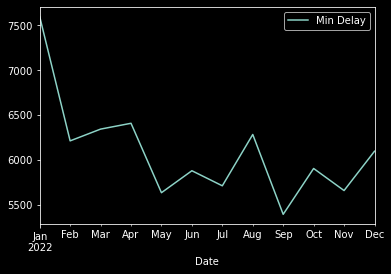

In [42]:
delays_2022 = data2[data2["year"] == 2022].set_index("Date").resample('m').sum()[["Min Delay"]]

delays_2022.plot()

In [44]:
data2[data2["year"] == 2022].sort_values("Min Delay", ascending=False)

,index,Date,Time,Day,Station,Min Delay,Min Gap,Bound,Line,Vehicle,CODE DESCRIPTION,year
8228,MRPLB,2022-12-08,17:52,Thursday,MIDLAND STATION,458,463,S,SRT,3002,Fire/Smoke Plan B,2022
58914,PRSO,2022-08-22,12:20,Monday,SRT LINE,451,457,NaN,SRT,0,Signals Other,2022
68530,PUTR,2022-04-28,06:02,Thursday,JANE STATION,388,394,E,BD,5225,Rail Related Problem,2022
41318,MUPLB,2022-07-26,07:06,Tuesday,YONGE BD STATION,382,386,W,BD,5354,Fire/Smoke Plan B - Source TTC,2022
42234,MUPR1,2022-08-15,12:57,Monday,DUFFERIN STATION,327,330,W,BD,5363,Priority One - Train in Contact With Person,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
32176,MUO,2022-12-25,09:11,Sunday,ISLINGTON STATION,0,0,E,BD,5230,Miscellaneous Other,2022
32177,MUO,2022-12-25,22:00,Sunday,YONGE-UNIVERSITY AND B,0,0,NaN,YU/BD,0,Miscellaneous Other,2022
32178,MUO,2022-12-26,21:32,Monday,DUFFERIN STATION,0,0,NaN,BD,0,Miscellaneous Other,2022
32179,MUO,2022-12-26,22:00,Monday,YONGE-UNIVERSITY AND B,0,0,NaN,YU/BD,0,Miscellaneous Other,2022


In [10]:
reasons_pivot_mins = data2.pivot_table(columns="year", index="CODE DESCRIPTION", values="Min Delay", aggfunc="sum").sort_values(2021, ascending=False).dropna(subset=[2022]).head(10)

reasons_pivot_mins

year,2014,2015,2016,2017,2018,2019,2020,2021,2022
CODE DESCRIPTION,,,,,,,,,
Priority One - Train in Contact With Person,1932.0,1123.0,1601.0,790.0,104.0,229.0,371.0,792.0,3922.0
Disorderly Patron,2366.0,1996.0,2695.0,985.0,406.0,293.0,482.0,542.0,6446.0
Unauthorized at Track Level,1046.0,1388.0,1496.0,829.0,121.0,53.0,50.0,468.0,5798.0
Injured or ill Customer (On Train) - Transported,2900.0,2633.0,3485.0,1023.0,392.0,528.0,333.0,247.0,2639.0
ATC Project,NaN,NaN,NaN,NaN,211.0,141.0,123.0,191.0,3831.0
Injured or ill Customer (On Train) - Medical Aid Refused,1991.0,1776.0,2217.0,810.0,231.0,289.0,211.0,165.0,2299.0
Passenger Other,1000.0,1150.0,1118.0,416.0,112.0,123.0,112.0,149.0,4132.0
Door Problems - Faulty Equipment,1861.0,1736.0,1603.0,612.0,267.0,180.0,101.0,103.0,1058.0
Misc. Transportation Other - Employee Non-Chargeable,775.0,567.0,770.0,247.0,75.0,81.0,97.0,102.0,993.0


In [11]:
stations_pivot = data2.pivot_table(index="Station", columns="year", values="Min Delay", aggfunc="sum").sort_values(2022, ascending=False)

stations_pivot

year,2014,2015,2016,2017,2018,2019,2020,2021,2022
Station,,,,,,,,,
FINCH STATION,1262.0,1095.0,958.0,495.0,70.0,122.0,151.0,77.0,3067.0
EGLINTON STATION,1823.0,943.0,1107.0,389.0,129.0,103.0,33.0,121.0,2619.0
KENNEDY BD STATION,1232.0,1721.0,1532.0,412.0,112.0,111.0,126.0,104.0,2026.0
KENNEDY SRT STATION,732.0,1663.0,1068.0,510.0,182.0,66.0,17.0,70.0,1995.0
ST GEORGE YUS STATION,857.0,624.0,754.0,292.0,58.0,67.0,30.0,45.0,1934.0
...,...,...,...,...,...,...,...,...,...
YORK MILLS STATION (AP,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
YORK MILLS STATION (LE,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
YORKDALE STATION (EXIT,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
stations_pivot.sum()

year
2014    41177.0
2015    35499.0
2016    38275.0
2017    14316.0
2018     5228.0
2019     4569.0
2020     3857.0
2021     4472.0
2022    73106.0
dtype: float64

In [14]:
data2.loc[data2["Station"].str.contains("GEORGE"), "Station"].unique()

array(['ST GEORGE BD STATION', 'ST GEORGE YUS STATION',
       'UNION TO ST GEORGE', 'ST GEORGE YU STATION',
       'ST GEORGE STATION TO B', 'ST GEORGE TO BROADVIEW',
       'BROADVIEW TO ST GEORGE', 'ST GEORGE STATION',
       'ST GEORGE TO LAWRENCE', 'PAPE TO ST GEORGE',
       'CHRISTIE - ST GEORGE S', 'ST GEORGE STN',
       'ST GEORGE BD STATION -', 'ST. GEORGE STATION'], dtype=object)

In [15]:
data2["Station"] = (data2["Station"]
                    .str.replace("ST GEORGE YUS STATION", "ST GEORGE YU STATION")
                    .str.replace("ST GEORGE STN|ST. GEORGE STATION", "ST GEORGE STATION")
                    )

data2.loc[data2["Station"].str.contains("GEORGE"), "Station"].unique()

C:\Users\dexmc\AppData\Local\Temp\ipykernel_22028\3128147751.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace("ST GEORGE STN|ST. GEORGE STATION", "ST GEORGE STATION")


array(['ST GEORGE BD STATION', 'ST GEORGE YU STATION',
       'UNION TO ST GEORGE', 'ST GEORGE STATION TO B',
       'ST GEORGE TO BROADVIEW', 'BROADVIEW TO ST GEORGE',
       'ST GEORGE STATION', 'ST GEORGE TO LAWRENCE', 'PAPE TO ST GEORGE',
       'CHRISTIE - ST GEORGE S', 'ST GEORGE BD STATION -'], dtype=object)

### By vehicle

In [34]:
delays = data.loc[data["Min Delay"] > 0, :].groupby("Vehicle")["Min Delay"].count().to_frame().sort_values("Min Delay", ascending=False)

delays

,Min Delay
Vehicle,
0,861
3007,144
5676,131
5761,131
5796,131
...,...
5812,1
5814,1
5823,1


In [35]:
data.loc[(data["Vehicle"] == 5676) & (data["Min Delay"] > 0)].sort_values("Min Delay", ascending=False)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
18101,2022-11-29,09:13,Tuesday,DAVISVILLE STATION,MUPR1,199,202,S,YU,5676
2421,2022-02-10,10:13,Thursday,KING STATION,SUBT,52,55,S,YU,5676
9563,2022-06-21,23:14,Tuesday,BLOOR STATION,SUUT,19,24,S,YU,5676
25524,2015-03-26,00:00,Thursday,DUPONT STATION,SUDP,17,22,S,YU,5676
56783,2016-09-17,01:54,Saturday,SHEPPARD STATION,SUAP,17,21,N,YU,5676
...,...,...,...,...,...,...,...,...,...,...
7275,2014-05-03,00:36,Saturday,ST CLAIR WEST STATION,MUPAA,3,8,N,YU,5676
2554,2014-02-12,18:17,Wednesday,ST CLAIR WEST STATION,TUSC,3,6,S,YU,5676
2530,2014-02-12,09:49,Wednesday,SHEPPARD STATION,SUDP,3,6,N,YU,5676
559,2014-01-10,07:12,Friday,FINCH STATION,TUO,3,6,S,YU,5676
